In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('/home/davi/Github/esquerta_centro_direita/archives/features_municipios.csv')
data

,UF,Nome_UF,Mesorregião,Nome_Meso,Microrregião,Nome_Micro,Município,Nome_Munic,siglas,espectro,T_FREQ6A14,T_FORA6A14,T_FREQ4A5,T_FORA4A5,T_LUZ,T_SLUZ,kmeans
0,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1100015,Alta Floresta D'Oeste,RO,D,95.68,4.32,39.18,60.82,93.98,6.02,0
1,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,1100023,Ariquemes,RO,D,97.21,2.79,55.34,44.66,98.58,1.42,0
2,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1100031,Cabixi,RO,E,98.03,1.97,66.92,33.08,96.36,3.64,0
3,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1100049,Cacoal,RO,D,97.61,2.39,62.41,37.59,98.89,1.11,0
4,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1100056,Cerejeiras,RO,D,98.54,1.46,61.27,38.73,98.85,1.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,52,Goiás,5205,Sul Goiano,52016,Pires do Rio,5222005,Vianópolis,GO,D,98.55,1.45,80.27,19.73,99.83,0.17,0
5532,52,Goiás,5205,Sul Goiano,52015,Meia Ponte,5222054,Vicentinópolis,GO,C,99.10,0.90,78.79,21.21,99.70,0.30,0
5533,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,5222203,Vila Boa,GO,D,95.96,4.04,30.42,69.58,99.78,0.22,0
5534,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,5222302,Vila Propício,GO,E,96.89,3.11,41.62,58.38,97.59,2.41,0


In [3]:
data.columns

Index(['UF', 'Nome_UF', 'Mesorregião', 'Nome_Meso', 'Microrregião',
       'Nome_Micro', 'Município', 'Nome_Munic', 'siglas', 'espectro',
       'T_FREQ6A14', 'T_FORA6A14', 'T_FREQ4A5', 'T_FORA4A5', 'T_LUZ', 'T_SLUZ',
       'kmeans'],
      dtype='object')

[Text(279.0, 398.64, 'T_SLUZ <= 0.035\nentropy = 0.005\nsamples = 5536\nvalue = [5534, 2]\nclass = Grupo 1'),
 Text(186.0, 326.15999999999997, 'T_SLUZ <= 0.025\nentropy = 0.025\nsamples = 802\nvalue = [800, 2]\nclass = Grupo 1'),
 Text(93.0, 253.67999999999998, 'entropy = 0.0\nsamples = 740\nvalue = [740, 0]\nclass = Grupo 1'),
 Text(279.0, 253.67999999999998, 'T_FORA6A14 <= 3.09\nentropy = 0.206\nsamples = 62\nvalue = [60, 2]\nclass = Grupo 1'),
 Text(186.0, 181.2, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]\nclass = Grupo 1'),
 Text(372.0, 181.2, 'T_FORA4A5 <= 13.93\nentropy = 0.592\nsamples = 14\nvalue = [12, 2]\nclass = Grupo 1'),
 Text(279.0, 108.71999999999997, 'Mesorregião <= 3209.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = Grupo 1'),
 Text(186.0, 36.23999999999995, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Grupo 1'),
 Text(372.0, 36.23999999999995, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Grupo 2'),
 Text(465.0, 108.71999999999997, 'entropy =

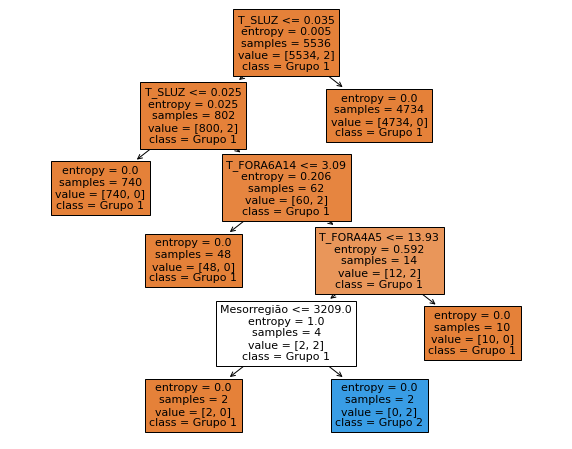

In [9]:
from sklearn import tree

x = data.loc[:,['UF', 'Mesorregião', 'Microrregião', 'Município','T_FREQ6A14', 'T_FORA6A14', 'T_FREQ4A5', 'T_FORA4A5', 'T_LUZ', 'T_SLUZ']]
y = data['kmeans']

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x,y)
fn=['UF', 'Mesorregião', 'Microrregião', 'Município','T_FREQ6A14', 'T_FORA6A14', 'T_FREQ4A5', 'T_FORA4A5', 'T_LUZ', 'T_SLUZ']
cn=['Grupo 1', 'Grupo 2']

fig = plt.figure(figsize=(10,8))
tree.plot_tree(clf,feature_names = fn, class_names=cn,filled = True)

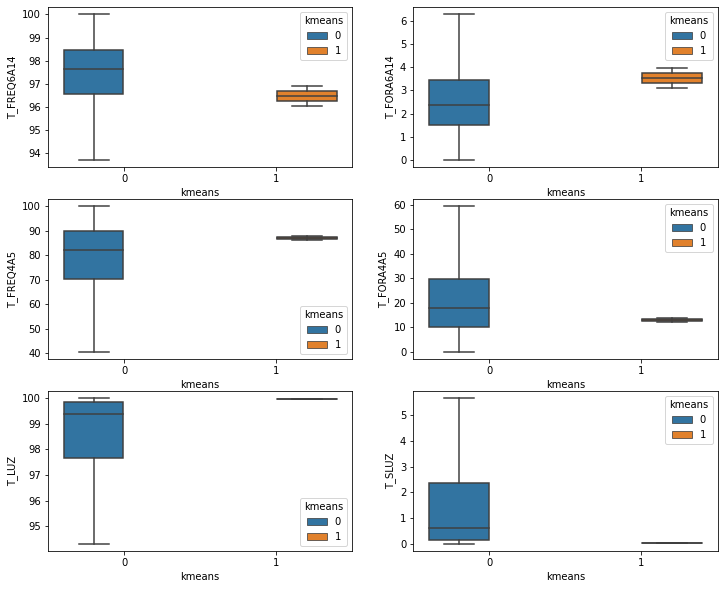

In [24]:
# 'T_FORA6A14', 'T_FREQ4A5', 'T_FORA4A5', 'T_LUZ', 'T_SLUZ'
figure, axes = plt.subplots(3,2,figsize = (12,10))



sns.boxplot(x='kmeans',y='T_FREQ6A14',data=data,hue='kmeans',showfliers=False,ax=axes[0,0])
sns.boxplot(x='kmeans',y='T_FORA6A14',data=data,hue='kmeans',showfliers=False,ax=axes[0,1])
sns.boxplot(x='kmeans',y='T_FREQ4A5',data=data,hue='kmeans',showfliers=False,ax=axes[1,0])
sns.boxplot(x='kmeans',y='T_FORA4A5',data=data,hue='kmeans',showfliers=False,ax=axes[1,1])
sns.boxplot(x='kmeans',y='T_LUZ',data=data,hue='kmeans',showfliers=False,ax=axes[2,0])
sns.boxplot(x='kmeans',y='T_SLUZ',data=data,hue='kmeans',showfliers=False,ax=axes[2,1])